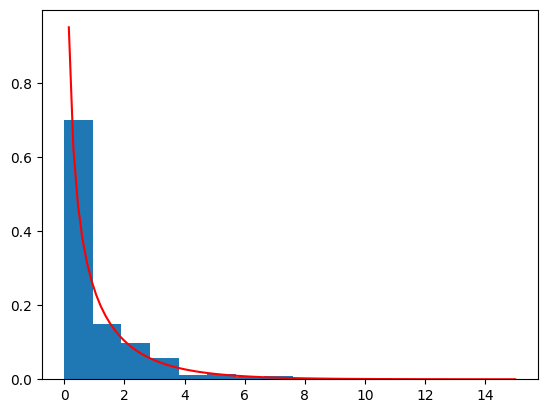

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, chi2

# Binomial example simulation
R = 10000
n = 100  # sample size
p0 = 0.9 # Null hypothesis value

x = np.random.binomial(n, p0, R)
p_hat = x / n
G2 = 2 * (x * np.log(p_hat / p0) + (n - x) * np.log((1 - p_hat) / (1 - p0)))

plt.hist(G2, density=True, bins=15)
grid = np.linspace(0, 15, 100)
plt.plot(grid, chi2.pdf(grid, 1), color='red')  # overlapping the theoretical distribution
plt.show()

<ipython-input-8-cf6749c98190>:10: RuntimeWarning: divide by zero encountered in divide
  return 2 * (x * np.log(p_hat / p) + (n - x) * np.log((1 - p_hat) / (1 - p)))


Text(0.59, 9, '5% upper quantile of ChiSq')

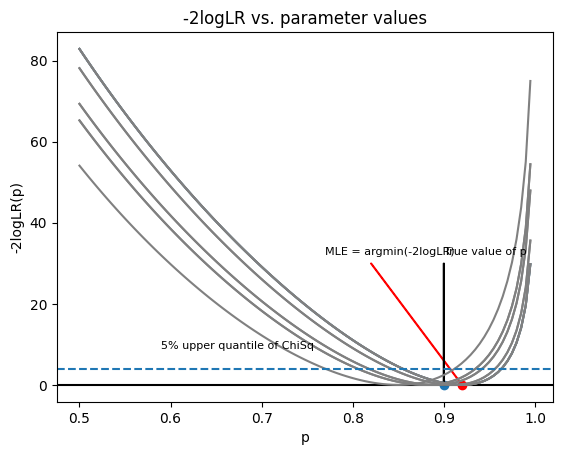

In [8]:
# Using the LRT for finding the so-called profile CIs
# Find the solution to G2 = quantile of chi-square with df = 1

x = np.random.binomial(n, p0, 1)[0]
p_hat = x / n
grid = np.linspace(0.5, 1, 100)

# Define the -2loglikelihood ratio for binomial
def G2_func(p):
    return 2 * (x * np.log(p_hat / p) + (n - x) * np.log((1 - p_hat) / (1 - p)))

plt.plot(grid, G2_func(grid), label='-2logLR vs. parameter values')
plt.xlabel("p")
plt.ylabel("-2logLR(p)")
plt.title("-2logLR vs. parameter values")
plt.arrow(p_hat - 0.1, 30, 0.1, -30, color='red', length_includes_head=True)
plt.text(p_hat - 0.15, 32, "MLE = argmin(-2logLR)", fontsize=8)
plt.scatter(p_hat, 0, color='red')
plt.scatter(p0, 0)
plt.arrow(p0, 30, 0, -30, length_includes_head=True)
plt.text(p0, 32, "True value of p", fontsize=8)
plt.axhline(0, color='black')

for i in range(10):
    x = np.random.binomial(n, p0, 1)[0]
    p_hat = x / n
    plt.plot(grid, G2_func(grid), color='gray')

plt.axhline(chi2.ppf(0.95, 1), linestyle='dashed')
plt.text(0.59, 9, "5% upper quantile of ChiSq", fontsize=8)

In [13]:
from scipy.optimize import fsolve
# Profile likelihood CI example
# Define the -2loglikelihood ratio for binomial
def G2(p):
    return 2 * (x * np.log(p_hat / p) + (n - x) * np.log((1 - p_hat) / (1 - p)))

def G2s(p):
    return G2(p) - chi2.ppf(0.95, 1)

# Finding roots
lower_bound = 0.01
upper_bound = 0.999

root1 = fsolve(G2s, lower_bound)
print(root1)
root2 = fsolve(G2s, upper_bound)
print(root2)


# Compare to z CI
z_ci = (p_hat - 1.96 * np.sqrt(p_hat * (1 - p_hat) / n), p_hat + 1.96 * np.sqrt(p_hat * (1 - p_hat) / n))
print("Wald CI: ", z_ci)


[0.84361045]
[0.95570236]
Wald CI:  (0.8539083749566836, 0.9660916250433165)
